# Generate Digits with GANs
- Paper: **Generative Adversarial Networks** by [Goodfellow et. al.](https://arxiv.org/abs/1406.2661)
- Year: 2014


In [2]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
import numpy as np

In [4]:
from gan_utils import build_discriminator
from gan_utils import build_generator
from gan_utils import sample_images
from gan_utils import train

In [5]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trai

In [6]:
generator=build_generator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               25856     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [7]:
# Noise for generator
z_dim = 100
z = Input(shape=(z_dim,))
img = generator(z)

# Fix the discriminator
discriminator.trainable = False

# Get discriminator output
validity = discriminator(img)

# Stack discriminator on top of generator
gan_model = Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5))
gan_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            1493520   
                                                                 
 sequential (Sequential)     (None, 1)                 533505    
                                                                 
Total params: 2,027,025
Trainable params: 1,489,936
Non-trainable params: 537,089
_________________________________________________________________


  0%|          | 0/60000 [00:00<?, ?it/s]

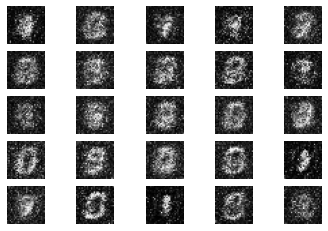

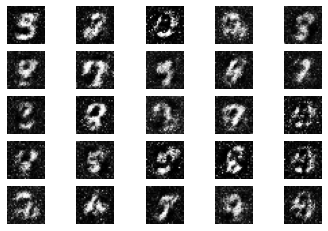

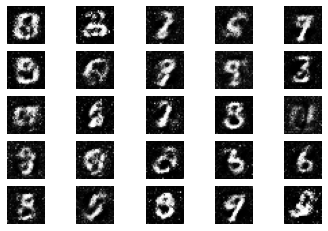

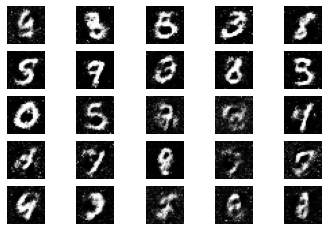

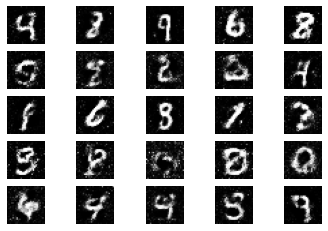

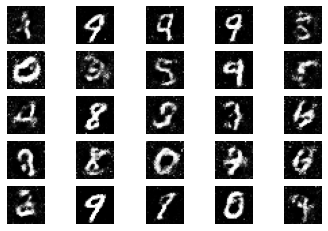

In [ ]:
train(generator,discriminator,gan_model,epochs=60000, batch_size=512, sample_interval=1000)

# Generating Faces with GANs

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
%matplotlib inline

## Progressive GAN

- Paper:  **Progressive Growing of GANs for Improved Quality, Stability, and Variation** by [Karras et. al](https://arxiv.org/abs/1710.10196)
- Year: 2017

In [15]:
tf.random.set_seed(42)

In [13]:
pro_gan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

In [17]:
vector = tf.random.normal([1, 512])
sample_image = pro_gan(vector)['default'][0]
np_img = sample_image.numpy()

(-0.5, 127.5, 127.5, -0.5)

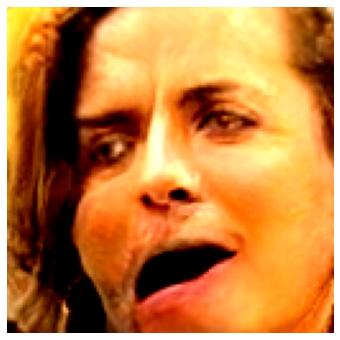

In [20]:
plt.figure(figsize=(6,6))
plt.imshow(np_img);
plt.axis('off')

## Style-GAN-3

- Paper:  **Alias-Free Generative Adversarial Networks** by [Karras et. al](https://nvlabs.github.io/stylegan3)
- Year: 2021

In [6]:
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

fatal: destination path 'stylegan3' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 108 kB 27.2 MB/s 


In [8]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-256x256.pkl"

In [9]:
!python /content/stylegan3/gen_images.py --network={URL} --outdir=/content/results --seeds=2020-2029 

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-256x256.pkl"...
Generating image for seed 2020 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
Generating image for seed 2021 (1/10) ...
Generating image for seed 2022 (2/10) ...
Generating image for seed 2023 (3/10) ...
Generating image for seed 2024 (4/10) ...
Generating image for seed 2025 (5/10) ...
Generating image for seed 2026 (6/10) ...
Generating image for seed 2027 (7/10) ...
Generating image for seed 2028 (8/10) ...
Generating image for seed 2029 (9/10) ...


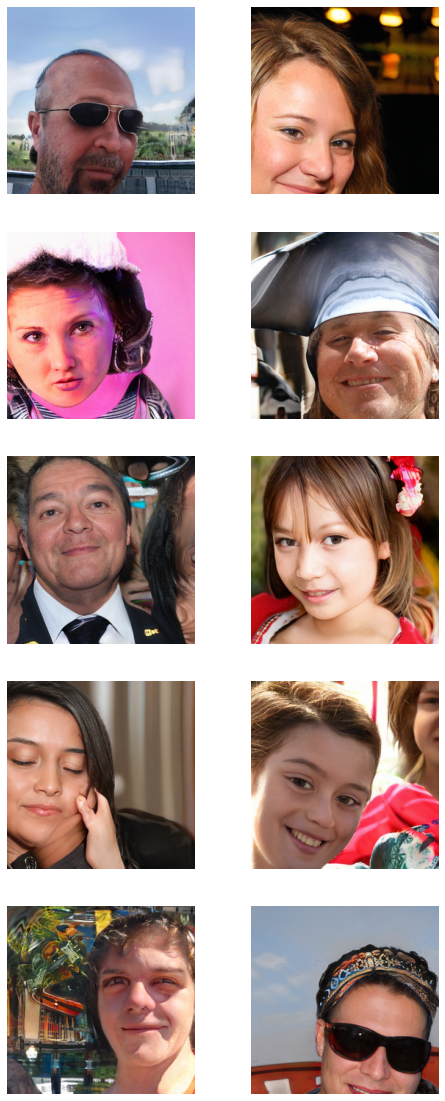

In [10]:
_, axs = plt.subplots(5,2, figsize=(8, 20))
axs = axs.flatten()
for img, ax in zip(os.listdir('results'), axs):
    ax.imshow(plt.imread(f"results/{img}"))
    ax.axis('off')
plt.show()

# What Next?

- [More Complex GANs](https://github.com/hindupuravinash/the-gan-zoo): There's a whole Zoo of complex and highly domain focused model architectures
- **Diffusion Models**: A completely different paradigm with a lot of promise
  - [DALL-E-2](https://openai.com/dall-e-2/)
  - [Google ImaGen](https://imagen.research.google/)
  - [Stable Diffusion](https://stability.ai/blog/stable-diffusion-public-release)